In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# read csv files and import into pd dataframes
UW_marine_data_path: str = './data/unity_water_estuarine_marine_data.csv'
UW_monitoring_data_path: str = './data/unity_water_mid-field_monitoring_data.csv'

SCC_alpha_x_data_path: str = './data/sunshine_coast_council_alpha_x.csv'

MB_redcliffe_BOM_data_path: str = './data/moreton_bay_council_RedCliffe_BOM.csv'
MB_SC_BOM_data_path: str = './data/moreton_bay_council_SC_BOM.csv'

df_UW_marine = pd.read_csv(UW_marine_data_path)
df_UW_monitoring = pd.read_csv(UW_monitoring_data_path)

df_SCC = pd.read_csv(SCC_alpha_x_data_path)

df_MB_redcliffe = pd.read_csv(MB_redcliffe_BOM_data_path)
df_MB_SC = pd.read_csv(MB_SC_BOM_data_path)

# Sunshine Coast Council
## Example graph generation
### Prompt
here is the prompt for the sunshine coast council example.

`question`= Should I take my dog on a walk near Sugar Bag Road around 4pm or will there be too many car? 
```py
datasets = {
    "unity_water_mid-field_monitoring_data": [
        "Date Sample Collected", "Time Sample Collected", "Temperature",
        "Dissolved Oxygen", "pH", "E.Cond.", "Secchi Depth", "Salinity (Field)",
        "E. coli", "Thermotolerant coliforms", "Intestinal enterococci",
        "Chlorophyll a", "Chloro-a Phenophytin ratio", "BOD5", "Suspended Solids",
        "Organic Carbon - Total", "Ammonia as N", "Nitrate + Nitrite as N",
        "Phosphate as P", "Total Nitrogen as N", "Total Phosphorus as P", "TKN as N (TN-NOX)"
    ],
    "unity_water_estuarine_marine_data": [
        "Location name", "Lat (GDA94)", "Long (GDA94)", "Survey date", "Depth (m)",
        "Chlorophyll a (ug/L)", "Secchi depth (metres)", "Total N (mg/L)",
        "Ammonia (mg/L)", "Organic N (mg/L)", "NOx (mg/L)", "DO (mg/L)",
        "DO saturation (%)", "pH (Unit)", "Pheopigments (ug/L)", "FRP (mg/L)",
        "Total P (mg/L)", "Salinity (g/L)", "Conductivity (mS/cm)", "Temp (deg C)",
        "Turbidity (NTU)"
    ],
    "sunshine_coast_council_alpha_x": [
        "datetime", "F1 - peopleLeft/Up", "F2 - peopleRight/Down", 
        "F3 - bikesLeft/Up", "F4 - bikesRight/Down", "F5 - carsLeft/Up", 
        "F6 - carsRight/Down", "F7 - busesLeft/Up", "F8 - busesRight/Down", 
        "F9 - trucksLeft/Up", "F10 - trucksRight/Down", "Total People", 
        "Total Bikes", "Total Cars", "Total Buses", "Total Trucks"
    ],
    "moreton_bay_council_SC_BOM": [
        "name[80]", "local_date_time_full[80]", "aifstime_utc[80]", "lat", "lon", 
        "apparent_t", "cloud_base_m", "cloud_oktas", "cloud_type_id", "delta_t", 
        "gust_kmh", "gust_kt", "air_temp", "dewpt", "press", "press_msl", 
        "press_qnh", "rain_trace[80]", "rel_hum", "swell_height", "swell_period", 
        "wind_dir[80]", "wind_spd_kmh", "wind_spd_kt"
    ],
    "moreton_bay_council_RedCliffe_BOM": [
        "name[80]", "local_date_time_full[80]", "aifstime_utc[80]", "lat", "lon", 
        "apparent_t", "cloud_base_m", "cloud_oktas", "cloud_type_id", "delta_t", 
        "gust_kmh", "gust_kt", "air_temp", "dewpt", "press", "press_msl", 
        "press_qnh", "rain_trace[80]", "rel_hum", "swell_height", "swell_period", 
        "wind_dir[80]", "wind_spd_kmh", "wind_spd_kt"
    ]
}
```

of these {datasets} what does {question} best fit.

Within this dataset, which of the column/s in datasets[dataset[column]] would help answer the {question}?
#### temp
Of these columns generate a some code which takes the data from the csv file.
#### Full version
Of these columns generate a query to get the data from the database
`response` = {F5 - carsLeft/Up: 553, F6 - carsRight/Down: 327}
### re-prompt with response to user
data = {F5 - carsLeft/Up: 553, F6 - carsRight/Down: 327}
with respect to {question} explain what might be the best option given the following data points: {data}

then give me 3 general safety tips relating to {question}

In [18]:
data = df_SCC
# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Filter for records around 4pm on a specific day (e.g., 2024-09-08)
start_time = '2024-04-08 16:00:00'
end_time = '2024-04-08 17:00:00'
filtered_data = data[(data['datetime'] >= start_time) & (data['datetime'] <= end_time)]

# Analyzing the number of cars in both directions
traffic_analysis = filtered_data[['F5 - carsLeft/Up', 'F6 - carsRight/Down']].sum()

print(traffic_analysis)


F5 - carsLeft/Up       553
F6 - carsRight/Down    327
dtype: int64


# Morton Bay Council
## Prompt
here is the prompt for the Morton Bay Council example.

`question`= Should I go swimming in the north pine river after it has been raining?
```py
datasets = {
    "unity_water_mid-field_monitoring_data": [
        "Date Sample Collected", "Time Sample Collected", "Temperature",
        "Dissolved Oxygen", "pH", "E.Cond.", "Secchi Depth", "Salinity (Field)",
        "E. coli", "Thermotolerant coliforms", "Intestinal enterococci",
        "Chlorophyll a", "Chloro-a Phenophytin ratio", "BOD5", "Suspended Solids",
        "Organic Carbon - Total", "Ammonia as N", "Nitrate + Nitrite as N",
        "Phosphate as P", "Total Nitrogen as N", "Total Phosphorus as P", "TKN as N (TN-NOX)"
    ],
    "unity_water_estuarine_marine_data": [
        "Location name", "Lat (GDA94)", "Long (GDA94)", "Survey date", "Depth (m)",
        "Chlorophyll a (ug/L)", "Secchi depth (metres)", "Total N (mg/L)",
        "Ammonia (mg/L)", "Organic N (mg/L)", "NOx (mg/L)", "DO (mg/L)",
        "DO saturation (%)", "pH (Unit)", "Pheopigments (ug/L)", "FRP (mg/L)",
        "Total P (mg/L)", "Salinity (g/L)", "Conductivity (mS/cm)", "Temp (deg C)",
        "Turbidity (NTU)"
    ],
    "sunshine_coast_council_alpha_x": [
        "datetime", "F1 - peopleLeft/Up", "F2 - peopleRight/Down", 
        "F3 - bikesLeft/Up", "F4 - bikesRight/Down", "F5 - carsLeft/Up", 
        "F6 - carsRight/Down", "F7 - busesLeft/Up", "F8 - busesRight/Down", 
        "F9 - trucksLeft/Up", "F10 - trucksRight/Down", "Total People", 
        "Total Bikes", "Total Cars", "Total Buses", "Total Trucks"
    ],
    "moreton_bay_council_SC_BOM": [
        "name[80]", "local_date_time_full[80]", "aifstime_utc[80]", "lat", "lon", 
        "apparent_t", "cloud_base_m", "cloud_oktas", "cloud_type_id", "delta_t", 
        "gust_kmh", "gust_kt", "air_temp", "dewpt", "press", "press_msl", 
        "press_qnh", "rain_trace[80]", "rel_hum", "swell_height", "swell_period", 
        "wind_dir[80]", "wind_spd_kmh", "wind_spd_kt"
    ],
    "moreton_bay_council_RedCliffe_BOM": [
        "name[80]", "local_date_time_full[80]", "aifstime_utc[80]", "lat", "lon", 
        "apparent_t", "cloud_base_m", "cloud_oktas", "cloud_type_id", "delta_t", 
        "gust_kmh", "gust_kt", "air_temp", "dewpt", "press", "press_msl", 
        "press_qnh", "rain_trace[80]", "rel_hum", "swell_height", "swell_period", 
        "wind_dir[80]", "wind_spd_kmh", "wind_spd_kt"
    ]
}
```

of these {datasets} what does {question} best fit.

Within this dataset, which of the column/s in datasets[dataset[column]] would help answer the {question}?
#### temp
Of these columns generate a some code which takes the data from the csv file.
#### Full version
Of these columns generate a query to get the data from the database
`response` = {F5 - carsLeft/Up: 553, F6 - carsRight/Down: 327}
### re-prompt with response to user
data = {F5 - carsLeft/Up: 553, F6 - carsRight/Down: 327}
with respect to {question} explain what might be the best option given the following data points: {data}

then give me 3 general safety tips relating to {question}

In [20]:
# Load the datasets
water_data = df_UW_marine
weather_data = df_MB_redcliffe

# Convert date columns to datetime if not already
water_data['Survey date'] = pd.to_datetime(water_data['Survey date'])
weather_data['local_date_time_full[80]'] = pd.to_datetime(weather_data['local_date_time_full[80]'])

# Filter for recent dates and possibly specific locations if applicable
recent_water_data = water_data[water_data['Survey date'] >= 'recent_date']
recent_weather_data = weather_data[weather_data['local_date_time_full[80]'] >= 'recent_date']

# Merge datasets on dates for a comprehensive view
combined_data = pd.merge_asof(recent_water_data.sort_values('Survey date'), recent_weather_data.sort_values('local_date_time_full[80]'), 
                              left_on='Survey date', right_on='local_date_time_full[80]', direction='nearest')

# Analyze the data
high_turbidity_rainy_days = combined_data[(combined_data['Turbidity (NTU)'] > safe_turbidity_level) &
                                          (combined_data['rain_trace[80]'] > rain_threshold)]

print(high_turbidity_rainy_days[['Survey date', 'Turbidity (NTU)', 'rain_trace[80]']])


TypeError: Invalid comparison between dtype=datetime64[ns] and str

## Unity Water
### Prompt
How has the `water quality` changed in the `North Pine river` between `July 2018` and `July 2023`? 


`question`= How has the `water quality` changed in the `North Pine river` between `July 2018` and `July 2023`? 
```py
datasets = {
  "unity_water_mid-field_monitoring_data": [
    "Date Sample Collected",
    "Time Sample Collected",
    "Temperature",
    "Dissolved Oxygen",
    "pH",
    "Secchi Depth",
    "Salinity (Field)",
    "E. coli",
    "Chlorophyll a",
    "Chloro-a Phenophytin ratio",
    "Suspended Solids",
    "Organic Carbon - Total",
    "Phosphate as P",
    "Total Nitrogen as N",
    "Total Phosphorus as P",
    "TKN as N (TN-NOX)"
  ],
  "unity_water_estuarine_marine_data": [
    "Location name",
    "Lat (GDA94)",
    "Long (GDA94)",
    "Survey date",
    "Depth (m)",
    "Chlorophyll a (ug/L)",
    "Secchi depth (metres)",
    "Total N (mg/L)",
    "Ammonia (mg/L)",
    "Organic N (mg/L)",
    "NOx (mg/L)",
    "DO (mg/L)",
    "DO saturation (%)",
    "pH (Unit)",
    "Pheopigments (ug/L)",
    "FRP (mg/L)",
    "Total P (mg/L)",
    "Salinity (g/L)",
    "Conductivity (mS/cm)",
    "Temp (deg C)",
    "Turbidity (NTU)"
  ],
  "sunshine_coast_council_alpha_x": [
    "datetime",
    "F1 - peopleLeft/Up",
    "F2 - peopleRight/Down",
    "F3 - bikesLeft/Up",
    "F4 - bikesRight/Down",
    "F5 - carsLeft/Up",
    "F6 - carsRight/Down",
    "F7 - busesLeft/Up",
    "F8 - busesRight/Down",
    "F9 - trucksLeft/Up",
    "F10 - trucksRight/Down",
    "Total People",
    "Total Bikes",
    "Total Cars",
    "Total Buses",
    "Total Trucks"
  ],
  "moreton_bay_council_SC_BOM": [
    "name[80]",
    "local_date_time_full[80]",
    "aifstime_utc[80]",
    "lat",
    "lon",
    "apparent_t",
    "cloud_base_m",
    "cloud_oktas",
    "cloud_type_id",
    "delta_t",
    "gust_kmh",
    "gust_kt",
    "air_temp",
    "dewpt",
    "press",
    "press_msl",
    "press_qnh",
    "rain_trace[80]",
    "rel_hum",
    "swell_height",
    "swell_period",
    "wind_dir[80]",
    "wind_spd_kmh",
    "wind_spd_kt"
  ],
  "moreton_bay_council_RedCliffe_BOM": [
    "name[80]",
    "local_date_time_full[80]",
    "aifstime_utc[80]",
    "lat",
    "lon",
    "apparent_t",
    "cloud_base_m",
    "cloud_oktas",
    "cloud_type_id",
    "delta_t",
    "gust_kmh",
    "gust_kt",
    "air_temp",
    "dewpt",
    "press",
    "press_msl",
    "press_qnh",
    "rain_trace[80]",
    "rel_hum",
    "swell_height",
    "swell_period",
    "wind_dir[80]",
    "wind_spd_kmh",
    "wind_spd_kt"
  ]
}

```

of these {datasets} what does {question} best fit.

Within this dataset, which of the column/s in datasets[dataset[column]] would help answer the {question}?
#### temp
Of these columns generate a some code which takes the data from the csv file.

In [21]:
# Load the data
df = df_UW_monitoring

# Convert 'Date Sample Collected' to datetime format
df['Date Sample Collected'] = pd.to_datetime(df['Date Sample Collected'])

# Filter data for the period between July 2018 and July 2023
start_date = '2018-07-01'
end_date = '2023-07-31'
filtered_df = df[(df['Date Sample Collected'] >= start_date) & (df['Date Sample Collected'] <= end_date)]

# Display the first few rows of the filtered data
print(filtered_df.head())

    Date Sample Collected Time Sample Collected  Temperature  \
364            2018-07-05              08:15:00         18.7   
365            2018-07-05              08:50:00         19.1   
366            2018-07-05              09:15:00         19.2   
367            2018-07-05              09:40:00         19.3   
368            2018-07-05              10:10:00         19.3   

     Dissolved Oxygen   pH Secchi Depth  Salinity (Field) E. coli  \
364               6.2  7.5          1.4              27.0      <1   
365               5.6  7.5          1.4              27.8   6 EST   
366               5.0  7.4          1.5              26.0   5 EST   
367               4.2  7.4          1.4              25.0   8 EST   
368               4.7  7.3          1.4              25.6      11   

    Chlorophyll a  Chloro-a Phenophytin ratio Suspended Solids  \
364             2                         1.1               23   
365             2                         1.0               12   
36

```py
data =  {Date Sample Collected Time Sample Collected  Temperature  \
364            2018-07-05              08:15:00         18.7   
365            2018-07-05              08:50:00         19.1   
366            2018-07-05              09:15:00         19.2   
367            2018-07-05              09:40:00         19.3   
368            2018-07-05              10:10:00         19.3   

     Dissolved Oxygen   pH Secchi Depth  Salinity (Field) E. coli  \
364               6.2  7.5          1.4              27.0      <1   
365               5.6  7.5          1.4              27.8   6 EST   
366               5.0  7.4          1.5              26.0   5 EST   
367               4.2  7.4          1.4              25.0   8 EST   
368               4.7  7.3          1.4              25.6      11   

    Chlorophyll a  Chloro-a Phenophytin ratio Suspended Solids  \
364             2                         1.1               23   
365             2                         1.0               12   
366           1.3                         1.0                9   
367           1.3                         1.0               59   
368            <1                         1.0               10   

    Organic Carbon - Total Phosphate as P  Total Nitrogen as N  \
364                      5          0.048                 0.47   
365                   <0.5          0.055                 0.48   
366                   <0.5          0.054                 0.48   
367                   <0.5          0.049                 0.50   
368                   <0.5          0.047                 0.48   

     Total Phosphorus as P  TKN as N (TN-NOX)  
364                   0.08               0.42  
365                   0.08               0.43  
366                   0.08               0.42  
367                   0.07               0.42  
368                   0.07               0.41  }
```

with respect to {question} explain what might be the best option given the following data points: {data}

then give me 3 general safety tips relating to {question}

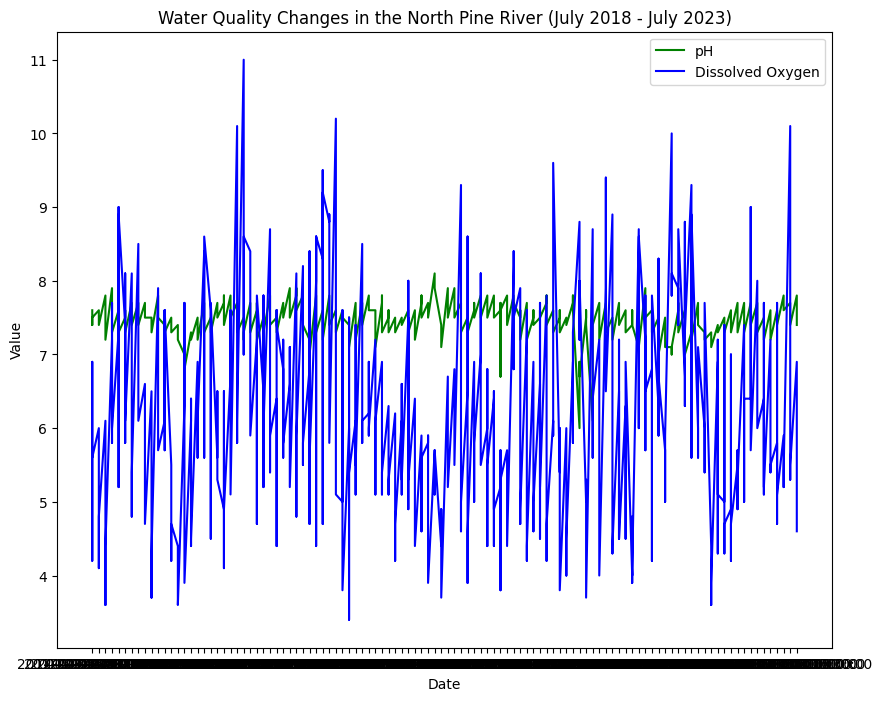

In [19]:
df = df_UW_monitoring

# Plotting multiple parameters over time to observe changes in water quality
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting pH and Dissolved Oxygen as examples
ax.plot(df['Date Sample Collected'], df['pH'], label='pH', color='green', )
ax.plot(df['Date Sample Collected'], df['Dissolved Oxygen'], label='Dissolved Oxygen', color='blue')

ax.set_title('Water Quality Changes in the North Pine River (July 2018 - July 2023)')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
"""
ax.set_xticks([
    '1/7/2018', '1/7/2020', '1/7/2022'
])
"""
ax.legend()
plt.show()

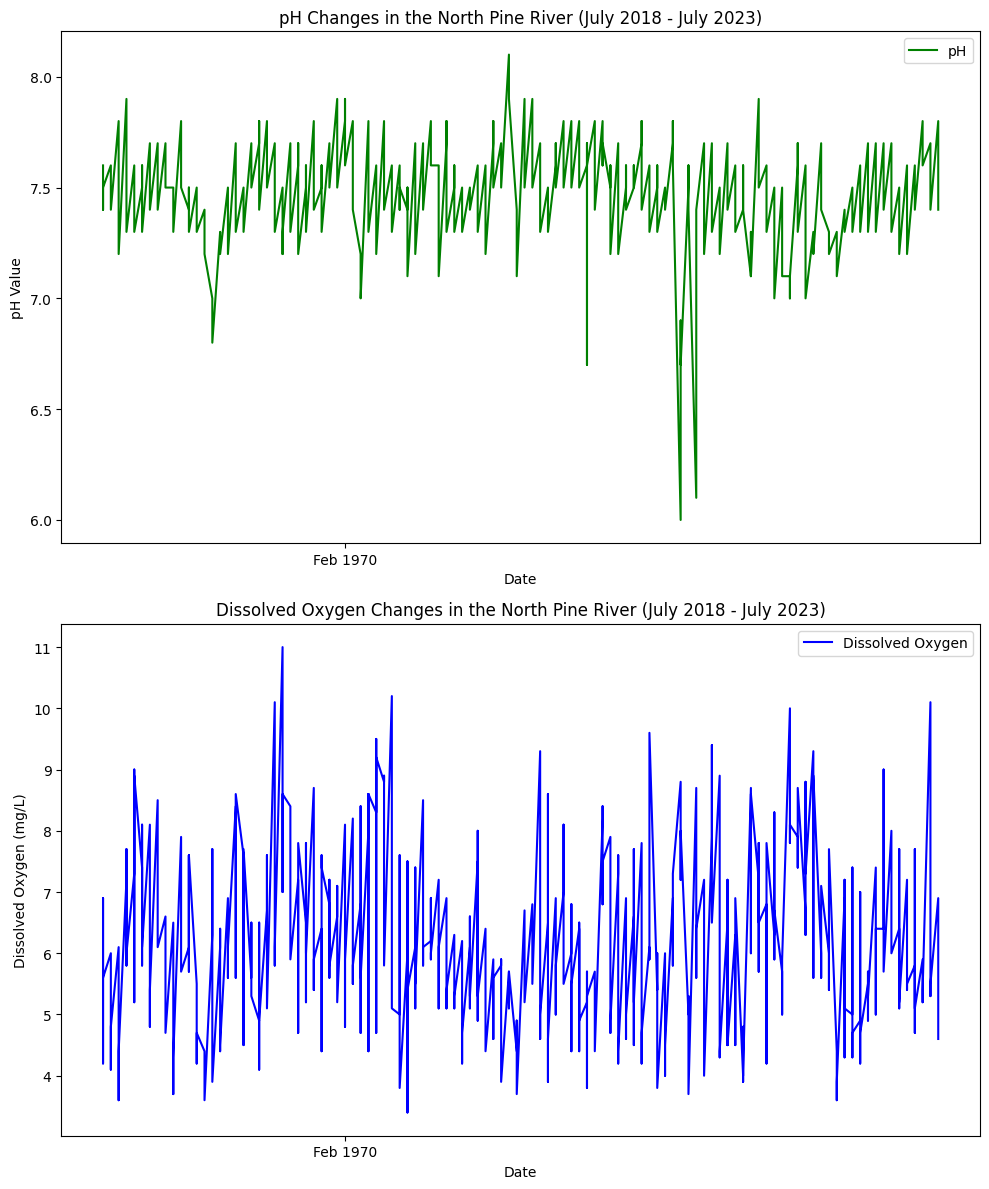

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Creating two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

# Plotting pH over time on the first subplot
ax1.plot(df['Date Sample Collected'], df['pH'], label='pH', color='green')
ax1.set_title('pH Changes in the North Pine River (July 2018 - July 2023)')
ax1.set_xlabel('Date')
ax1.set_ylabel('pH Value')
ax1.legend()

# Setting x-axis to display every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Plotting Dissolved Oxygen over time on the second subplot
ax2.plot(df['Date Sample Collected'], df['Dissolved Oxygen'], label='Dissolved Oxygen', color='blue')
ax2.set_title('Dissolved Oxygen Changes in the North Pine River (July 2018 - July 2023)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Dissolved Oxygen (mg/L)')
ax2.legend()

# Setting x-axis to display every 3 months
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
